# Moedel selection in Deep learning

## Data pre-processing

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv("ALL.csv") #read csv
print(df.shape)
df.head()

(103008, 10)


,Unnamed: 0,product_name,username,verification,point,date,review,detail,helpful,image
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...,NaN,not image
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...,NaN,not image
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Great sound</span>,<span>These little buds pick up music greatly....,NaN,not image
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,...",NaN,not image
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0 out of 5 stars,"Reviewed in the United States on November 21, ...",<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo...",NaN,not image


In [2]:
#delete the unreletive column
df = df.drop(["Unnamed: 0","date","image","helpful"],axis=1)
df = df.fillna('')
print(df.shape)
df.head()

(103008, 6)


,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0 out of 5 stars,<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0 out of 5 stars,<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0 out of 5 stars,<span>Great sound</span>,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0 out of 5 stars,<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0 out of 5 stars,<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo..."


In [3]:
import re

for i in range(len(df["point"])):
    str_point = df["point"][i]
    result = re.match(pattern='[0-9]\.[0-9]',string=str_point)
    df["point"][i] = result.group()
print(df.shape)
df.head()

(103008, 6)


,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,<span>Great sound</span>,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo..."


In [4]:
from bs4 import BeautifulSoup
for i in range(len(df["review"])):
    str_title = df["review"][i]
    bsObj = BeautifulSoup(str_title, 'lxml')
    df["review"][i] = bsObj.get_text()
df.head()

,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"<span>What can you say, they're headphones. Wo..."


In [5]:
for i in range(len(df["detail"])):
    str_review = df["detail"][i]
    bsObj = BeautifulSoup(str_review, 'lxml')
    df["detail"][i] = bsObj.get_text()
df.head()

,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [6]:
#emoji
import emoji
def remove_emoji(text, replace=""):
    return emoji.replace_emoji(text,replace="")

for i in range(len(df["review"])):
    text = df["review"][i]
    res = remove_emoji(text, '')
    df["review"][i] = res

for i in range(len(df["detail"])):
    text = df["detail"][i]
    res = remove_emoji(text, '')
    df["detail"][i] = res
df.head()
df.to_csv('offemoji.csv')

In [47]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

df= pd.read_csv("offemoji.csv")
df.head()

,Unnamed: 0,product_name,username,verification,point,review,detail
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [5]:
df1 = df[df["detail"].str.len()>5]
print(df1.shape)
df1.head()

(101081, 7)


,Unnamed: 0,product_name,username,verification,point,review,detail
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [6]:
df1 = df1.dropna()
print(df1.shape)

(87456, 7)


In [7]:
df1.drop_duplicates(subset=['product_name','username'],keep='first',inplace=True,ignore_index=True)
df1.shape

(80141, 7)

In [8]:
from bs4 import BeautifulSoup
import re

def remove_html(text):
    bs = BeautifulSoup(text, "html.parser")
    return ' ' + bs.get_text() + ' '
 
def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z\s]',' ',text)
    return text
 
def convert_to_lowercase(text):
    return text.lower()
 
def clean_reviews(text):
    text = remove_html(text)
    text = keep_only_letters(text)
    text = convert_to_lowercase(text)
    return text
 
df1['detail'] = df1['detail'].apply(lambda review: clean_reviews(review))

/Users/xiangxin/miniforge3/envs/anly-580/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/xiangxin/miniforge3/envs/anly-580/lib/python3.9/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [9]:
df1

,Unnamed: 0,product_name,username,verification,point,review,detail
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,within days the right ear bud stopped worki...
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,i ordered these and another pair from more ...
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,these little buds pick up music greatly i c...
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,i don t know that is worth returning but ...
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,what can you say they re headphones work we...
...,...,...,...,...,...,...,...
80136,102878,Skullcandy Hesh Evo Wireless Over-Ear Headphon...,SC,Verified Purchase,5.0,Just what I needed!,i like these a lot i ve never managed to fin...
80137,102880,Skullcandy Hesh Evo Wireless Over-Ear Headphon...,Fox,Verified Purchase,5.0,Good quality great sound.,i had the black ones and now i m ordering the...
80138,102885,Skullcandy Hesh Evo Wireless Over-Ear Headphon...,Darcy,Verified Purchase,5.0,Love the bass of this headphone,i was a bit hesitant at first i didn t know ...
80139,102886,Skullcandy Hesh Evo Wireless Over-Ear Headphon...,Elise,Verified Purchase,5.0,Love them,best sound for value i ve had no issues with...


In [10]:
import spacy 
from itertools import combinations 
 
# Set globals 
nlp = spacy.load("en_core_web_md") 
 
def pre_process(titles): 
    """ 
    Pre-processes titles by removing stopwords and lemmatizing text. 
    :param titles: list of strings, contains target titles,. 
    :return: preprocessed_title_docs, list containing pre-processed titles. 
    """ 
     
    # Preprocess all the titles 
    title_docs = [nlp(x) for x in titles] 
    preprocessed_title_docs = [] 
    lemmatized_tokens = [] 
    for title_doc in title_docs: 
        for token in title_doc: 
            if not token.is_stop: 
                lemmatized_tokens.append(token.lemma_) 
        preprocessed_title_docs.append(" ".join(lemmatized_tokens)) 
        del lemmatized_tokens[ 
            : 
            ]  # empty the lemmatized tokens list as the code moves onto a new title 
 
    return preprocessed_title_docs 

def similarity_filter(titles): 
    """ 
    Recursively check if titles pass a similarity filter. 
    :param titles: list of strings, contains titles. 
    If the function finds titles that fail the similarity test, the above param will be the function output. 
    :return: this method upon itself unless there are no similar titles; in that case the feed that was passed 
    in is returned. 
    """ 
 
    # Preprocess titles 
    preprocessed_title_docs = pre_process(titles) 
 
    # Remove similar titles 
    all_summary_pairs = list(combinations(preprocessed_title_docs, 2)) 
    similar_titles = [] 
    for pair in all_summary_pairs: 
        title1 = nlp(pair[0]) 
        title2 = nlp(pair[1]) 
        similarity = title1.similarity(title2) 
        if similarity > 0.98: 
            similar_titles.append(pair) 

    titles_to_remove = [] 
    for a_title in similar_titles: 
        # Get the index of the first title in the pair 
        index_for_removal = preprocessed_title_docs.index(a_title[0]) 
        titles_to_remove.append(index_for_removal) 
 
    # Get indices of similar titles and remove them 
    similar_title_counts = set(titles_to_remove) 
    similar_titles = [ 
        x[1] for x in enumerate(titles) if x[0] in similar_title_counts 
    ] 
    # Exit the recursion if there are no longer any similar titles 
    if len(similar_title_counts) == 0: 
        return titles 
 
    # Continue the recursion if there are still titles to remove 
    else: 
        # Remove similar titles from the next input 
        for title in similar_titles: 
            idx = titles.index(title) 
            titles.pop(idx) 
 
        return similarity_filter(titles) 
 
your_title_list = list(df1["detail"])
titless = similarity_filter(your_title_list)

In [11]:
df1.loc[(df1['point'] == 1.0) | (df1['point'] == 2.0)|(df1['point'] == 3.0), 'senti'] = 'neg'
df1.loc[(df1['point'] == 4.0) | (df1['point'] == 5.0), 'senti'] = 'pos'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1["detail"], df1["senti"], test_size=0.2, random_state=123)

In [13]:
from collections import Counter
 
counter = Counter([words for reviews in X_train for words in reviews.split()])
df = pd.DataFrame()
df['key'] = counter.keys()
df['value'] = counter.values()
df.sort_values(by='value', ascending=False, inplace=True)
 
print (df.shape[0])
print (df[:10000].value.sum()/df.value.sum())
top_10k_words = list(df[:10000].key.values)

27452
0.9922112969636498


In [14]:
import numpy as np

def get_encoded_input(review):
    words = review.split()
    if len(words) > 500:
        words = words[:500]
    encoding = []
    for word in words:
        try:
            index = top_10k_words.index(word)
        except:
            index = 10000
        encoding.append(index)
    while len(encoding) < 500:
        encoding.append(10001)
    return encoding
 
training_data = np.array([get_encoded_input(review) for review in X_train])
testing_data = np.array([get_encoded_input(review) for review in X_test])
print (training_data.shape, testing_data.shape)

(64112, 500) (16029, 500)


In [15]:
train_labels = [1 if sentiment=='pos' else 0 for sentiment in y_train]
test_labels = [1 if sentiment=='pos' else 0 for sentiment in y_test]
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Multi-layer Perceptron (Dense Neural Network) model

In [76]:
#Multi-layer Perceptron (Dense Neural Network) model
import tensorflow
from tensorflow.keras.layers import Activation
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Flatten()(data)
 
data = tensorflow.keras.layers.Dense(16)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(8)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(4)(data)
data = tensorflow.keras.layers.Activation('relu')(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 500, 32)           320064    
                                                                 
 flatten_5 (Flatten)         (None, 16000)             0         
                                                                 
 dense_30 (Dense)            (None, 16)                256016    
                                                                 
 activation_20 (Activation)  (None, 16)                0         
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 8)                 136 

In [77]:
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

Epoch 1/10


2022-11-27 20:10:43.462169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - ETA: 0s - loss: 0.6176 - accuracy: 0.7158

2022-11-27 20:12:48.102782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - 125s 488ms/step - loss: 0.6176 - accuracy: 0.7158 - val_loss: 0.4205 - val_accuracy: 0.8628
Epoch 2/10
251/251 [==============================] - 6s 26ms/step - loss: 0.6152 - accuracy: 0.7159 - val_loss: 0.6024 - val_accuracy: 0.7141
Epoch 3/10
251/251 [==============================] - 6s 25ms/step - loss: 0.6079 - accuracy: 0.7156 - val_loss: 0.6001 - val_accuracy: 0.7141
Epoch 4/10
251/251 [==============================] - 6s 23ms/step - loss: 0.6045 - accuracy: 0.7156 - val_loss: 0.5998 - val_accuracy: 0.7141
Epoch 5/10
251/251 [==============================] - 6s 23ms/step - loss: 0.6014 - accuracy: 0.7156 - val_loss: 0.5989 - val_accuracy: 0.7141
Epoch 6/10
251/251 [==============================] - 6s 23ms/step - loss: 0.5995 - accuracy: 0.7156 - val_loss: 0.5986 - val_accuracy: 0.7141
Epoch 7/10
251/251 [==============================] - 6s 23ms/step - loss: 0.5987 - accuracy: 0.7156 - val_loss: 0.5987 - val_accuracy: 0.7141
Epoch 8

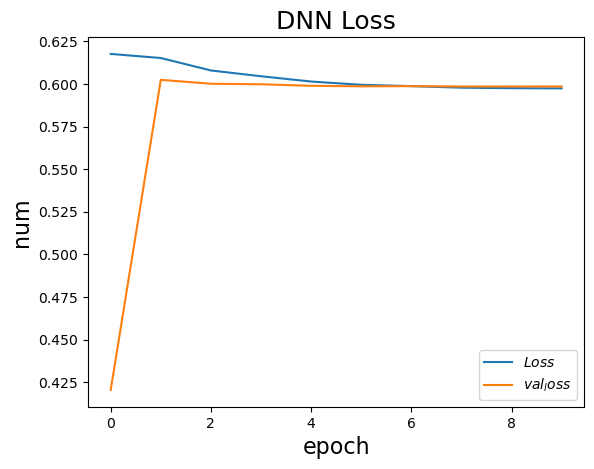

In [50]:

dnn_loss = [0.6176,0.6152,0.6079,0.6045,0.6014,0.5995,0.5987,0.5978,0.5975,0.5974]
dnn_val_loss = [0.4205,0.6024,0.6001,0.5998,0.5989,0.5986,0.5987,0.5985,0.5985,0.5985]
[0.7158,0.7159,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156]
[0.8628,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141]
plt.plot(dnn_loss, label="$Loss$")
plt.plot(dnn_val_loss, label='$val_loss$')
plt.title('DNN Loss',fontsize=18)
plt.xlabel('epoch',fontsize=16)
plt.ylabel('num',fontsize=16)
plt.legend()
plt.show()

## RNN

In [13]:
# RNN
import tensorflow
from tensorflow.keras.layers import Activation
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 32)           320064    
                                                                 
 bidirectional (Bidirectiona  (None, 100)              8300      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 328,465
Trainable params: 328,46

2022-11-27 20:26:03.516644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-27 20:26:03.516747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

Epoch 1/10


2022-11-27 20:26:16.194118: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-27 20:26:16.846161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 27/251 [==>...........................] - ETA: 14:09:19 - loss: 0.5884 - accuracy: 0.7141

## LSTM

In [16]:
#LSTM (Long Short-Term Memory)
import tensorflow
from tensorflow.keras.layers import Activation
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.LSTM(50)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 500, 32)           320064    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 336,715
Trainable params: 336,715
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

Epoch 1/10


2022-11-27 23:15:00.476964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 23:15:00.790509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 23:15:02.303286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


501/501 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7149

2022-11-27 23:16:59.561082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 23:16:59.673897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


501/501 [==============================] - 132s 251ms/step - loss: 0.6009 - accuracy: 0.7149 - val_loss: 0.5989 - val_accuracy: 0.7141
Epoch 2/10
501/501 [==============================] - 116s 231ms/step - loss: 0.5973 - accuracy: 0.7156 - val_loss: 0.5989 - val_accuracy: 0.7141
Epoch 3/10
501/501 [==============================] - 117s 234ms/step - loss: 0.5972 - accuracy: 0.7156 - val_loss: 0.5999 - val_accuracy: 0.7141
Epoch 4/10
501/501 [==============================] - 119s 237ms/step - loss: 0.5970 - accuracy: 0.7158 - val_loss: 0.6000 - val_accuracy: 0.7141
Epoch 5/10
501/501 [==============================] - 123s 245ms/step - loss: 0.5968 - accuracy: 0.7159 - val_loss: 0.5985 - val_accuracy: 0.7141
Epoch 6/10
501/501 [==============================] - 135s 269ms/step - loss: 0.5967 - accuracy: 0.7162 - val_loss: 0.5985 - val_accuracy: 0.7139
Epoch 7/10
501/501 [==============================] - 135s 270ms/step - loss: 0.5979 - accuracy: 0.7162 - val_loss: 0.5989 - val_accura

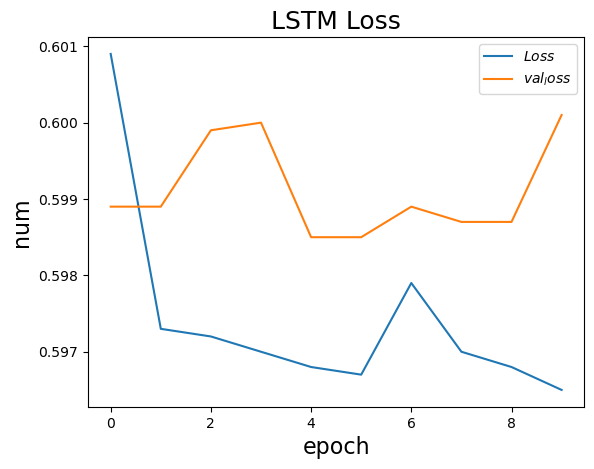

In [51]:
lstm_loss = [0.6009,0.5973,0.5972,0.5970,0.5968,0.5967,0.5979,0.5970,0.5968,0.5965]
lstm_val_loss = [0.5989,0.5989,0.5999,0.6000,0.5985,0.5985,0.5989,0.5987,0.5987,0.6001]
[0.7149,0.7156,0.7156,0.7158,0.7159,0.7162,0.7162,0.7162,0.7163,0.7163]
[0.7141,0.7141,0.7141,0.7141,0.7141,0.7139,0.7140,0.7140,0.7140,0.7137]
plt.plot(lstm_loss, label="$Loss$")
plt.plot(lstm_val_loss, label='$val_loss$')
plt.title('LSTM Loss',fontsize=18)
plt.xlabel('epoch',fontsize=16)
plt.ylabel('num',fontsize=16)
plt.legend()
plt.show()

## BiLSTM

In [12]:
#BiLSTM (Bidirectional Long Short-Term Memory)
import tensorflow
from tensorflow.keras.layers import Activation
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-27 22:13:18.809711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-27 22:13:18.809952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 32)           320064    
                                                                 
 bidirectional (Bidirectiona  (None, 100)              33200     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 353,365
Trainable params: 353,365
Non-trainable params: 0
_______________________________________________________

In [13]:
model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

Epoch 1/10


2022-11-27 22:13:20.855450: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-27 22:13:22.395097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:13:22.922897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:13:22.957910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:13:26.996994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:13:27.021222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


501/501 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.8280

2022-11-27 22:17:18.456974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:17:18.595206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-27 22:17:18.608112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


501/501 [==============================] - 260s 498ms/step - loss: 0.3745 - accuracy: 0.8280 - val_loss: 0.2818 - val_accuracy: 0.8846
Epoch 2/10
501/501 [==============================] - 220s 440ms/step - loss: 0.2520 - accuracy: 0.8996 - val_loss: 0.2679 - val_accuracy: 0.8917
Epoch 3/10
501/501 [==============================] - 208s 415ms/step - loss: 0.2208 - accuracy: 0.9132 - val_loss: 0.2646 - val_accuracy: 0.8969
Epoch 4/10
501/501 [==============================] - 210s 419ms/step - loss: 0.2098 - accuracy: 0.9180 - val_loss: 0.2702 - val_accuracy: 0.8949
Epoch 5/10
501/501 [==============================] - 199s 398ms/step - loss: 0.1899 - accuracy: 0.9268 - val_loss: 0.2671 - val_accuracy: 0.9000
Epoch 6/10
501/501 [==============================] - 199s 397ms/step - loss: 0.1737 - accuracy: 0.9330 - val_loss: 0.2748 - val_accuracy: 0.8986
Epoch 7/10
501/501 [==============================] - 202s 404ms/step - loss: 0.1647 - accuracy: 0.9369 - val_loss: 0.2723 - val_accura

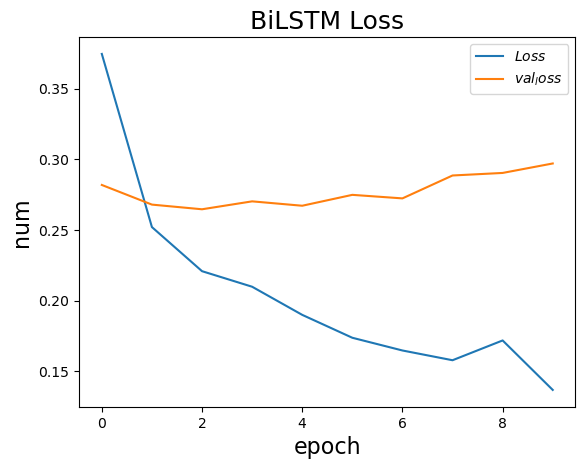

In [49]:
bi_loss = [0.3745,0.2520,0.2208,0.2098,0.1899,0.1737,0.1647,0.1578,0.1718,0.1368]
bi_val_loss = [0.2818,0.2679,0.2646,0.2702,0.2671,0.2748,0.2723,0.2885,0.2903,0.2970]
[0.8280,0.8996,0.9132,0.9180,0.9268,0.9330,0.9369,0.9409,0.9367,0.9501]
[0.8846,0.8917,0.8969,0.8949,0.9000,0.8986,0.8988,0.8979,0.8991,0.8997]
plt.plot(bi_loss, label="$Loss$")
plt.plot(bi_val_loss, label='$val_loss$')
plt.title('BiLSTM Loss',fontsize=18)
plt.xlabel('epoch',fontsize=16)
plt.ylabel('num',fontsize=16)
plt.legend()
plt.show()

## 1D CNN

In [14]:
#1D CNN (Convolutional Neural Network)
import tensorflow
 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=10002, output_dim=32, input_length=500)(input_data)
 
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
 
data = tensorflow.keras.layers.Flatten()(data)
 
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
 
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 32)           320064    
                                                                 
 conv1d (Conv1D)             (None, 498, 50)           4850      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 50)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 247, 40)           6040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 123, 40)          0         
 1D)                                                       

In [15]:
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))


Epoch 1/10


2022-11-27 22:48:30.924685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.7921

2022-11-27 22:52:10.876366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - 221s 871ms/step - loss: 0.4596 - accuracy: 0.7921 - val_loss: 0.6145 - val_accuracy: 0.7141
Epoch 2/10
251/251 [==============================] - 9s 38ms/step - loss: 0.6015 - accuracy: 0.7156 - val_loss: 0.5985 - val_accuracy: 0.7141
Epoch 3/10
251/251 [==============================] - 9s 36ms/step - loss: 0.6005 - accuracy: 0.7156 - val_loss: 0.5985 - val_accuracy: 0.7141
Epoch 4/10
251/251 [==============================] - 9s 36ms/step - loss: 0.6000 - accuracy: 0.7156 - val_loss: 0.5988 - val_accuracy: 0.7141
Epoch 5/10
251/251 [==============================] - 9s 35ms/step - loss: 0.6000 - accuracy: 0.7156 - val_loss: 0.6014 - val_accuracy: 0.7141
Epoch 6/10
251/251 [==============================] - 9s 36ms/step - loss: 0.5993 - accuracy: 0.7156 - val_loss: 0.5988 - val_accuracy: 0.7141
Epoch 7/10
251/251 [==============================] - 9s 36ms/step - loss: 0.5990 - accuracy: 0.7156 - val_loss: 0.5989 - val_accuracy: 0.7141
Epoch 8

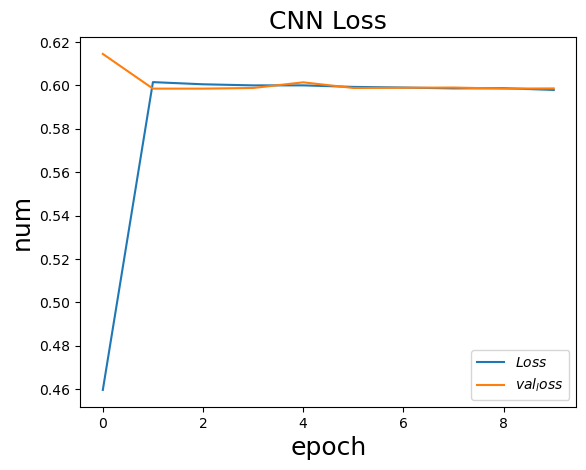

In [46]:
import matplotlib.pyplot as plt
cnn_loss = [0.4596,0.6015,0.6005,0.6000,0.6000,0.5993,0.5990,0.5986,0.5987,0.5979]
cnn_val_loss = [0.6145,0.5985,0.5985,0.5988,0.6014,0.5988,0.5989,0.5990,0.5985,0.5986]
[0.7921,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156,0.7156]
[0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141,0.7141]
plt.plot(cnn_loss, label="$Loss$")
plt.plot(cnn_val_loss, label='$val_loss$')
plt.title('CNN Loss',fontsize=18)
plt.xlabel('epoch',fontsize=18)
plt.ylabel('num',fontsize=18)
plt.legend()
plt.show()

